## 1. Data Wrangling 

In [ ]:
!pip install seaborn

     |████████████████████████████████| 225kB 3.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
#matplotlib.style.use('fast')

In [ ]:
def convert_day_month(lst):
    m = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr':4,
        'april':4,
         'may':5,
         'jun':6,
         'jul':7,
         'aug':8,
         'sep':9,
         'oct':10,
         'nov':11,
         'dec':12
        }
    s = lst[1][:3].lower()

    try:
        out = m[s]
        lst = [out, lst[0]]
        return lst
    except:
        return lst

In [ ]:
def convert_year(string):
    if len(string)==2:
        return '20' + string
    if str(string) == 'None':
        return '2020'

In [ ]:
def split(string):
    if '-' in string:
        return str(string).split('-')
    if '/' in string:
        return str(string).split('/')


In [ ]:
df = pd.read_csv('data/covid_data_ph_may8.csv')

In [ ]:
df.isna().sum()

CaseCode           0
Age               11
AgeGroup          11
Sex                0
DateRepConf        0
DateRecover     9457
DateDied        9158
RemovalType     7840
DateRepRem      7840
Admitted        4645
RegionRes         20
ProvRes            0
ProvCityRes        0
RegionPSGC        39
ProvPSGC        1076
MunCityPSGC     1076
HealthStatus       0
Quarantined     5424
Location           0
Latitude           4
Longitude          4
Island Group      20
dtype: int64

#### Create data for number of confirmed cases

In [ ]:
#clean up dates
#
df_cases = df.copy()
df_cases['DM'] = df_cases.DateRepConf.apply(lambda x: split(x)[:2])
df_cases['DM'] = df_cases.DM.apply(lambda x: convert_day_month(x))
df_cases['Day'] = df_cases.DM.apply(lambda x: x[0])
df_cases['Month'] = df_cases.DM.apply(lambda x: x[1])
df_cases['Year'] = '2020'

In [ ]:
#reindex using datetime
df_cases['Date'] = pd.to_datetime(df_cases[['Year', 'Month', 'Day']])
df_cases.head(5)

CaseCode   Age  AgeGroup     Sex DateRepConf DateRecover  DateDied  \
0  C100119  31.0  30 to 34    Male    4-Dec-20         NaN       NaN   
1  C100264  58.0  55 to 59    Male    29-03-20         NaN       NaN   
2  C100648  34.0  30 to 34  Female    16-04-20         NaN       NaN   
3  C100660  43.0  40 to 44  Female    4-Feb-20         NaN  26-04-20   
4  C100776  43.0  40 to 44    Male    4-Jan-20         NaN       NaN   

  RemovalType DateRepRem Admitted  ... Quarantined  \
0         NaN        NaN      Yes  ...          No   
1         NaN        NaN       No  ...         NaN   
2         NaN        NaN       No  ...         Yes   
3         NaN        NaN      Yes  ...         Yes   
4         NaN        NaN      NaN  ...         NaN   

                         Location   Latitude   Longitude Island Group  \
0    Parañaque City, Metro Manila  14.479309  121.019184          NCR   
1  Mandaluyong City, Metro Manila  14.579526  121.034969          NCR   
2       Quezon City, Metro Manila  14.676045  121.043361          NCR   
3        Pasig City, Metro Manila  14.576163  121.084615          NCR   
4                    Pila, Laguna  14.234505  121.364998        Luzon   

         DM Day Month  Year       Date  
0   [12, 4]  12     4  2020 2020-04-12  
1  [29, 03]  29    03  2020 2020-03-29  
2  [16, 04]  16    04  2020 2020-04-16  
3    [2, 4]   2     4  2020 2020-04-02  
4    [1, 4]   1     4  2020 2020-04-01  

[5 rows x 27 columns]

In [ ]:
#create df for all cases
df_cases = df_cases.set_index('Date')
df_cases = df_cases['CaseCode'].resample('D').count()
df_c = df_cases.cumsum()

#### Create data for number of deaths

In [ ]:
#clean up dates
df_deaths = df.copy()
df_deaths = df_deaths[df_deaths['HealthStatus'] == 'Died']
df_deaths['DM'] = df_deaths.DateRepRem.apply(lambda x: split(x)[:2])
df_deaths['DM'] = df_deaths.DM.apply(lambda x: convert_day_month(x))
df_deaths['Day'] = df_deaths.DM.apply(lambda x: x[0])
df_deaths['Month'] = df_deaths.DM.apply(lambda x: x[1])
df_deaths['Year'] = '2020'

In [ ]:
#reindex using datetime
df_deaths['Date'] = pd.to_datetime(df_deaths[['Year', 'Month', 'Day']])

In [ ]:
#create df for all cases
df_deaths = df_deaths.set_index('Date')
df_deaths = df_deaths['CaseCode'].resample('D').count()
df_d = df_deaths.cumsum()

#### Merge the two dataframe - cumulative sum

In [ ]:
df_c = df_c.reset_index()
df_d = df_d.reset_index()
df_c = df_c.set_index('Date')
df_d = df_d.set_index('Date')
df_c.columns = ['Cases']
df_d.columns = ['Deaths']

In [ ]:
df_merged = pd.merge(df_c, df_d, how='outer', left_index=True, right_index=True)
df_merged.fillna(0, inplace=True)
df_merged.Deaths = df_merged.Deaths.astype(int)

In [ ]:
df_merged.head()

Cases  Deaths
Date                     
2020-01-30      1       0
2020-01-31      1       0
2020-02-01      1       0
2020-02-02      1       1
2020-02-03      2       1

#### Merge the two dataframe - daily count

In [ ]:
df_c2 = df_cases.reset_index()
df_d2 = df_deaths.reset_index()
df_c2 = df_c2.set_index('Date')
df_d2 = df_d2.set_index('Date')
df_c2.columns = ['Cases']
df_d2.columns = ['Deaths']

In [ ]:
df_merged2 = pd.merge(df_c2, df_d2, how='outer', left_index=True, right_index=True)
df_merged2.fillna(0, inplace=True)
df_merged2.Deaths = df_merged2.Deaths.astype(int)

In [ ]:
df_merged2.head()

Cases  Deaths
Date                     
2020-01-30      1       0
2020-01-31      0       0
2020-02-01      0       0
2020-02-02      0       1
2020-02-03      1       0

## 2. Descriptive Stats

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

df = df[~df['Latitude'].isnull()]
df = df[~df['Longitude'].isnull()]

In [ ]:
map_ = folium.Map(location=[14.552333, 121.018916], height=700, width=1000,
                    zoom_start = 11.5) 
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(map_)
map_.save("COVID19 May8.html")
map_

## 3. Distribution / Model

### Fitting Model to Cases & Deaths Data

###  1. Fitting Model to the number of cases.

Exponential:

Text(0.5, 0, 'Number of Confirmed Cases')

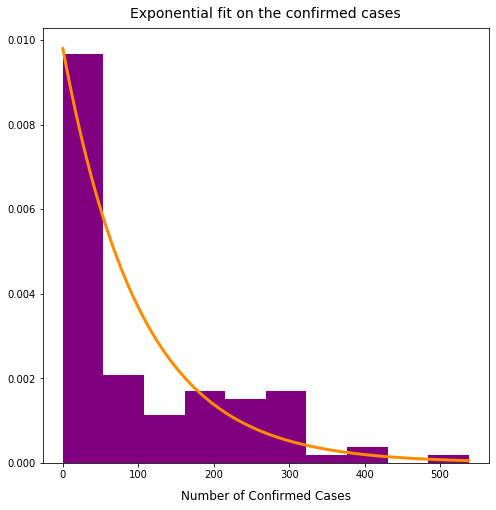

In [ ]:
import scipy.stats

fig, ax1 = plt.subplots(figsize=(8,8))

plt.hist(df_merged2.Cases, density=True, color='purple')

shape, loc = scipy.stats.expon.fit(df_merged2.Cases)
x = np.linspace(df_merged2.Cases.min(), df_merged2.Cases.max(),100)
plt.plot(x, scipy.stats.expon(shape, loc).pdf(x), color='darkorange', linewidth=3)
plt.title("Exponential fit on the confirmed cases", fontsize=14, pad=10)
plt.xlabel("Number of Confirmed Cases", fontsize=12, labelpad=10)

Text(0.5, 1.0, 'Exponential QQ-plot of the confirmed cases')

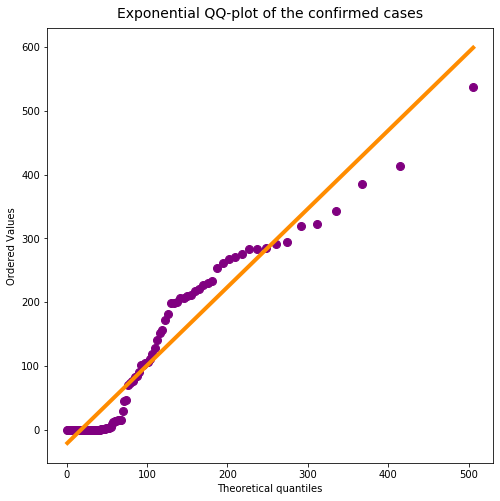

In [ ]:
from scipy.stats import probplot

fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
fig = probplot(df_merged2.Cases, \
         dist=scipy.stats.expon(shape, loc),\
         plot=ax)

ax.get_lines()[0].set_color('purple')
ax.get_lines()[1].set_color('darkorange')
ax.get_lines()[0].set_markersize(8)
ax.get_lines()[1].set_linewidth(4)

plt.title("Exponential QQ-plot of the confirmed cases", fontsize=14, pad=10)

In [ ]:
from scipy.stats import kstest
kstest(df_merged2.Cases, 'expon', (shape,loc))

KstestResult(statistic=0.37994079650204454, pvalue=3.1678757042131173e-13)

Normal:

Text(0.5, 0, 'Number of Confirmed Cases')

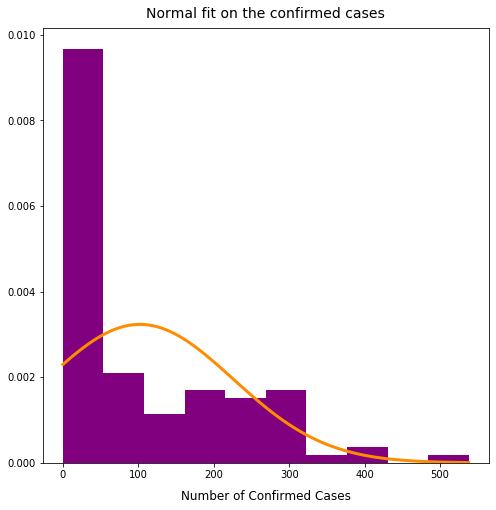

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,8))

plt.hist(df_merged2.Cases, density=True, color='purple')

shape, loc = scipy.stats.norm.fit(df_merged2.Cases)
x = np.linspace(df_merged2.Cases.min(), df_merged2.Cases.max(),100)
plt.plot(x, scipy.stats.norm(shape, loc).pdf(x), color='darkorange', linewidth=3)
plt.title("Normal fit on the confirmed cases", fontsize=14, pad=10)
plt.xlabel("Number of Confirmed Cases", fontsize=12, labelpad=10)

Text(0.5, 1.0, 'Normal QQ-plot of the confirmed cases')

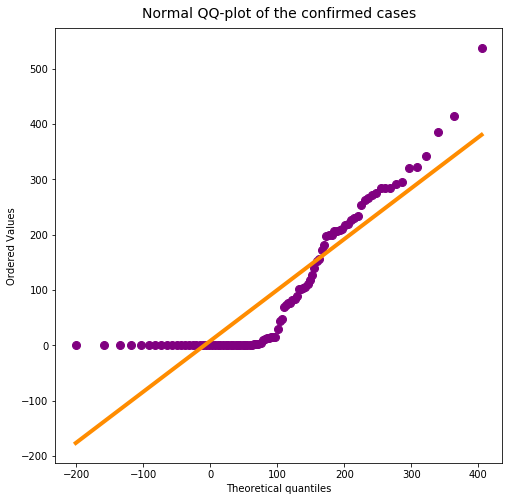

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
fig = probplot(df_merged2.Cases, \
         dist=scipy.stats.norm(shape, loc),\
         plot=ax)

ax.get_lines()[0].set_color('purple')
ax.get_lines()[1].set_color('darkorange')
ax.get_lines()[0].set_markersize(8)
ax.get_lines()[1].set_linewidth(4)

plt.title("Normal QQ-plot of the confirmed cases", fontsize=14, pad=10)

In [ ]:
kstest(df_merged2.Cases, 'norm', (shape,loc))

KstestResult(statistic=0.24708771126308715, pvalue=9.34591787444469e-06)

Normal model has slightly less kstest statistic than exponential.

### 2. Fitting Model to the number of deaths.

Exponential:

Text(0.5, 0, 'Number of Deaths')

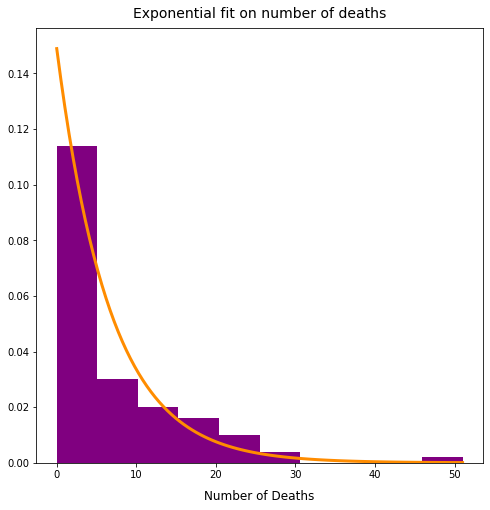

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,8))

plt.hist(df_merged2.Deaths, density=True, color='purple')

shape, loc = scipy.stats.expon.fit(df_merged2.Deaths)
x = np.linspace(df_merged2.Deaths.min(), df_merged2.Deaths.max(),100)
plt.plot(x, scipy.stats.expon(shape, loc).pdf(x), color='darkorange', linewidth=3)
plt.title("Exponential fit on number of deaths", fontsize=14, pad=10)
plt.xlabel("Number of Deaths", fontsize=12, labelpad=10)

Text(0.5, 1.0, 'Exponential QQ-plot of the number of deaths')

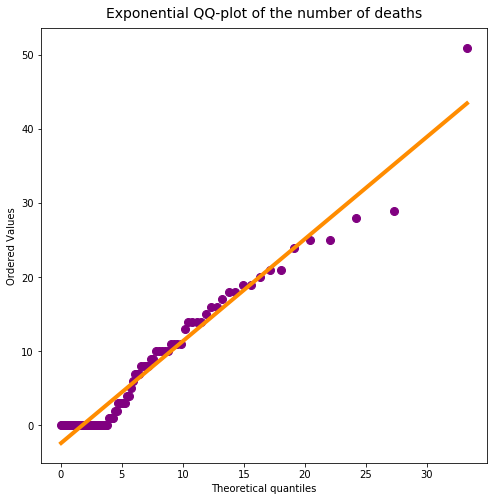

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
fig = probplot(df_merged2.Deaths, \
         dist=scipy.stats.expon(shape, loc),\
         plot=ax)

ax.get_lines()[0].set_color('purple')
ax.get_lines()[1].set_color('darkorange')
ax.get_lines()[0].set_markersize(8)
ax.get_lines()[1].set_linewidth(4)

plt.title("Exponential QQ-plot of the number of deaths", fontsize=14, pad=10)

In [ ]:
kstest(df_merged2.Deaths, 'expon', (shape,loc))

KstestResult(statistic=0.4387755102040816, pvalue=1.0853327668032689e-17)

Normal:

Text(0.5, 0, 'Number of Deaths')

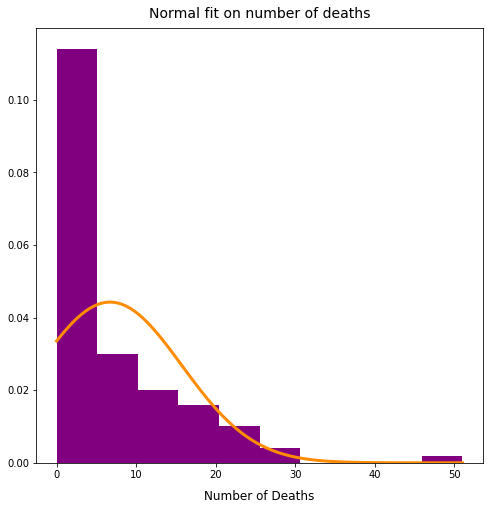

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,8))

plt.hist(df_merged2.Deaths, density=True, color='purple')

shape, loc = scipy.stats.norm.fit(df_merged2.Deaths)
x = np.linspace(df_merged2.Deaths.min(), df_merged2.Deaths.max(),100)
plt.plot(x, scipy.stats.norm(shape, loc).pdf(x), color='darkorange', linewidth=3)
plt.title("Normal fit on number of deaths", fontsize=14, pad=10)
plt.xlabel("Number of Deaths", fontsize=12, labelpad=10)

Text(0.5, 1.0, 'Normal QQ-plot of the number of deaths')

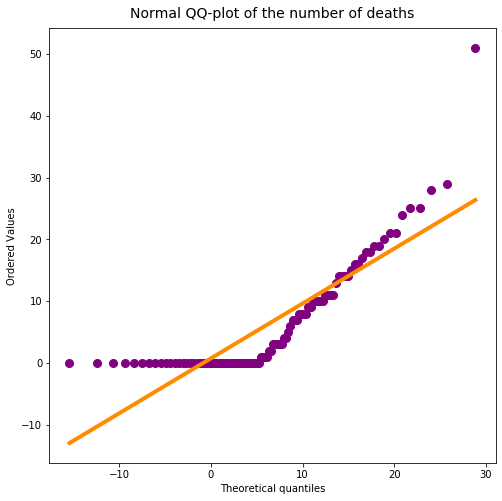

In [ ]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
fig = probplot(df_merged2.Deaths, \
         dist=scipy.stats.norm(shape, loc),\
         plot=ax)

ax.get_lines()[0].set_color('purple')
ax.get_lines()[1].set_color('darkorange')
ax.get_lines()[0].set_markersize(8)
ax.get_lines()[1].set_linewidth(4)

plt.title("Normal QQ-plot of the number of deaths", fontsize=14, pad=10)

In [ ]:
kstest(df_merged2.Deaths, 'norm', (shape,loc))

KstestResult(statistic=0.22819239684887388, pvalue=5.7425619543882423e-05)

##  4. Hypothesis Testing

In [ ]:
df_1 =df_merged2.copy()
df_1 = df_1['Cases'].pct_change().mul(100).round(2)
df_A = df_1.loc['2020-03-07':'2020-04-13']
df_B = df_1.loc['2020-04-14':]

In [ ]:
A=[]
for i in range(50):
    A.append(np.mean(np.random.choice(df_A.values, 50)))
np.mean(A)
np.mean(df_A)

112.22894736842109

In [ ]:
B=[]
for i in range(50):
    B.append(np.mean(np.random.choice(df_B.values, 50)))
np.mean(B)

9.261879999999998

In [ ]:
t_stat,pval=scipy.stats.ttest_ind(A, B)
print("The t-statistic from this data:",t_stat)
print("Corresponding p-value from this data:",pval)
if pval>0.05:
  print("Based on this data, NULL hypothesis cannot be rejected, i.e. there is no statistically significant difference between rate of increase of confirmed cases before and after mass testing")
else:
  print("There seems to be a statistically significant difference between rate of increase of confirmed cases before and after mass testing")

The t-statistic from this data: 11.365423384359785
Corresponding p-value from this data: 1.3589038760757026e-19
There seems to be a statistically significant difference between rate of increase of confirmed cases before and after mass testing


## 5. Regression Analysis

### What is the fatality rate?

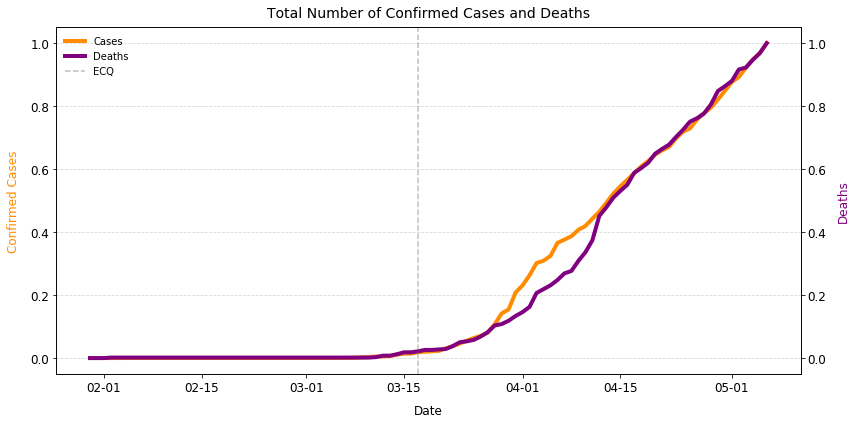

In [ ]:
import matplotlib.dates as mdates

fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(df_merged.index, df_merged.Cases/max(df_merged.Cases), 'darkorange', linewidth=4, label='Cases')
ax2.plot(df_merged.index, df_merged.Deaths/max(df_merged.Deaths), 'purple', linewidth=4, label='Deaths')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.axvline(pd.to_datetime('2020-03-17'),0,1000,label='ECQ', linestyle='--', color='grey', alpha=0.5)

ax1.set_xlabel('Date', fontsize=12, labelpad=10)
ax1.set_ylabel('Confirmed Cases', color='darkorange', fontsize=12, labelpad=10)
ax2.set_ylabel('Deaths', color='purple', fontsize=12, labelpad=10)
plt.title('Total Number of Confirmed Cases and Deaths', fontsize=14, pad=10)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, frameon=False)

fig.tight_layout()
plt.show()

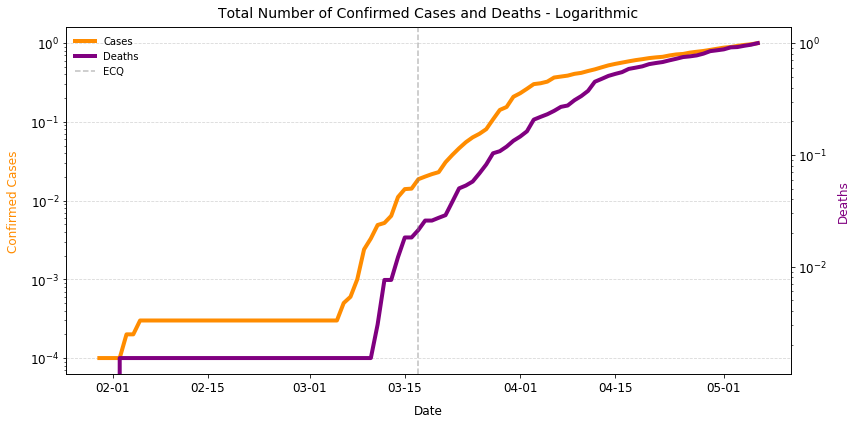

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(df_merged.index, df_merged.Cases/max(df_merged.Cases), 'darkorange', linewidth=4, label='Cases')
ax2.plot(df_merged.index, df_merged.Deaths/max(df_merged.Deaths), 'purple', linewidth=4, label='Deaths')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.grid('on', which='major', axis='y', linestyle='--', alpha=0.5)

ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

plt.axvline(pd.to_datetime('2020-03-17'),0,1000,label='ECQ', linestyle='--', color='grey', alpha=0.5)

ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('Date', fontsize=12, labelpad=10)
ax1.set_ylabel('Confirmed Cases', color='darkorange', fontsize=12, labelpad=10)
ax2.set_ylabel('Deaths', color='purple', fontsize=12, labelpad=10)
plt.title('Total Number of Confirmed Cases and Deaths - Logarithmic', fontsize=14, pad=10)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0, frameon=False)

fig.tight_layout()
plt.show()

Estimate Mortality Rate by use of Linear Regression

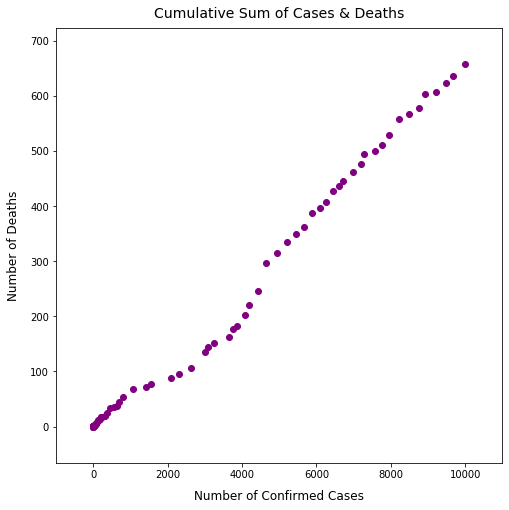

In [ ]:
fig, ax1 = plt.subplots(figsize=(8,8))

plt.scatter(df_merged.Cases,df_merged.Deaths, color='purple')
plt.title('Cumulative Sum of Cases & Deaths', fontsize=14, pad=10)
plt.xlabel('Number of Confirmed Cases', fontsize=12, labelpad=10)
plt.ylabel('Number of Deaths', fontsize=12, labelpad=10)

plt.margins(0.1)
plt.show()

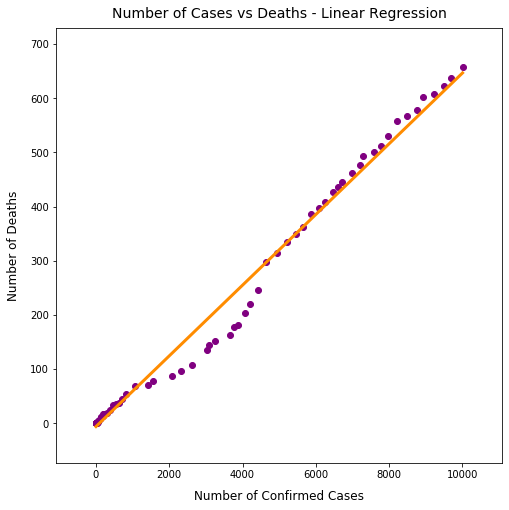

In [ ]:
import statsmodels.formula.api as smf
fig, ax1 = plt.subplots(figsize=(8,8))

lm=smf.ols('Deaths ~ Cases', data=df_merged).fit()
xmin = df_merged.Cases.min()
xmax = df_merged.Cases.max()
X = np.linspace(xmin,xmax,100)
Y=lm.params[0] + lm.params[1] * X
plt.plot(X,Y,color='darkorange', linewidth=3)

plt.scatter(df_merged.Cases,df_merged.Deaths, color='purple')
plt.title('Number of Cases vs Deaths - Linear Regression', fontsize=14, pad=10)
plt.xlabel('Number of Confirmed Cases', fontsize=12, labelpad=10)
plt.ylabel('Number of Deaths', fontsize=12, labelpad=10)

plt.margins(0.1)
plt.show()

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Deaths   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     9145.
Date:                Sat, 09 May 2020   Prob (F-statistic):           5.10e-97
Time:                        15:39:15   Log-Likelihood:                -438.12
No. Observations:                  98   AIC:                             880.2
Df Residuals:                      96   BIC:                             885.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1306      2.693     -2.276      0.025     -11.477      -0.784
Cases          0.0653      0.001     95.628      0.000       0.064       0.067
==============================================================================
Omnibus:                       50.270   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.909
Skew:                          -2.089   Prob(JB):                     5.00e-25
Kurtosis:                       6.156   Cond. No.                     4.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

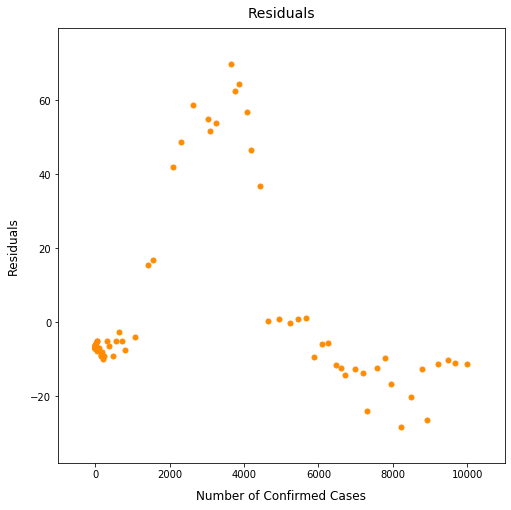

In [ ]:
residuals = lm.predict(df_merged) - df_merged.Deaths

fig, ax1 = plt.subplots(figsize=(8,8))

plt.plot(df_merged.Cases, residuals, '.', color='darkorange', markersize=10)
plt.title('Residuals', fontsize=14, pad=10)
plt.xlabel('Number of Confirmed Cases', fontsize=12, labelpad=10)
plt.ylabel('Residuals', fontsize=12, labelpad=10)

plt.margins(0.1)
plt.show()

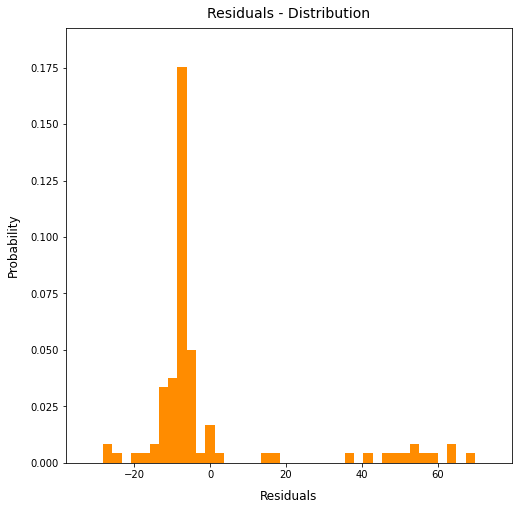

In [0]:
fig, ax1 = plt.subplots(figsize=(8,8))

plt.hist(residuals, bins=40, color='darkorange', density=True)
plt.title('Residuals - Distribution', fontsize=14, pad=10)
plt.xlabel('Residuals', fontsize=12, labelpad=10)
plt.ylabel('Probability', fontsize=12, labelpad=10)

plt.margins(0.1)
plt.show()

Text(0.5, 1.0, 'Normal QQ-plot of the residuals')

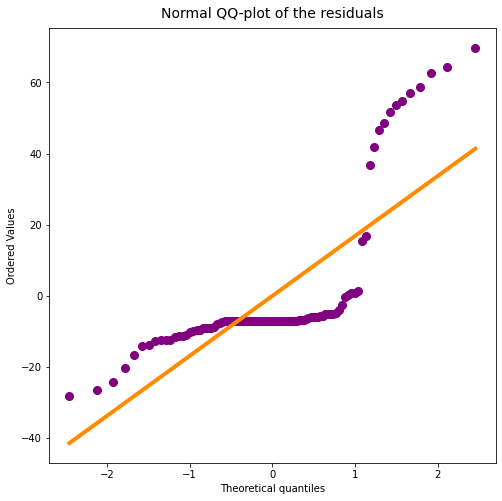

In [0]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111)
fig = probplot(residuals, \
         dist=scipy.stats.norm,\
         plot=ax)

ax.get_lines()[0].set_color('purple')
ax.get_lines()[1].set_color('darkorange')
ax.get_lines()[0].set_markersize(8)
ax.get_lines()[1].set_linewidth(4)

plt.title("Normal QQ-plot of the residuals", fontsize=14, pad=10)

In [ ]:
(scale, loc) = scipy.stats.norm.fit(residuals)
kstest(residuals, "norm", (scale, loc))

KstestResult(statistic=0.37791950980281175, pvalue=4.374241451519091e-13)

In [ ]:
lm.predict({'Cases':[550000]})

0    35890.666492
dtype: float64

In [ ]:
lm.predict({'Cases':[140000]})

0    9131.235914
dtype: float64

### Conclusion